### Importing and Understanding Data

Import NumPy, Pandas, matplotlib, seaborn and reading Bike Dataset

In [961]:
import warnings
warnings.filterwarnings('ignore')

In [962]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [963]:
bike = pd.read_csv("day.csv")

In [964]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [965]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [966]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [967]:
bike.shape

(730, 16)

##### Looking if there are any NULL or Missing Values

In [968]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###### There is no Null or Missing values in the dataset

#### Checking if there are any duplicate values

In [969]:
bike_duplicate = bike.copy()

bike_duplicate.drop_duplicates(subset=None, inplace=True)

In [970]:
bike_duplicate.shape

(730, 16)

##### We can see that there are no duplicate values in the dataset

### Dropping unwanted columns

Below are the columns that can be drop as they are redundant or not wanted

- **instant** : as instant is an index value  we don't need this in our analysis and can be dropped.
- **dteday** : Date can be dropped  as we already have monrth and year and thus date is redundant.
- **casual and registered** : This columns contain the number of bikes booked by non-registered and registered customer. As we are required to do our ananlysis on total counts of bikes and not on these 2 specific category we can drop them as well.

In [971]:
new_bike = bike.copy()

In [972]:
new_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [973]:
new_bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [974]:
new_bike.shape

(730, 12)

In [975]:
new_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [976]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [977]:
### Conveting the needed columns to category datatypes for creating dummy variables.
new_bike['season'] = new_bike['season'].astype('category')
new_bike['mnth'] = new_bike['mnth'].astype('category')
new_bike['weekday'] = new_bike['weekday'].astype('category')
new_bike['weathersit'] = new_bike['weathersit'].astype('category')

### Visualising Data

- ets now visualise the data and see if any multicollinearity is going on between the variables.
- Also lets check which predictors directly have strong association with outcome variables.

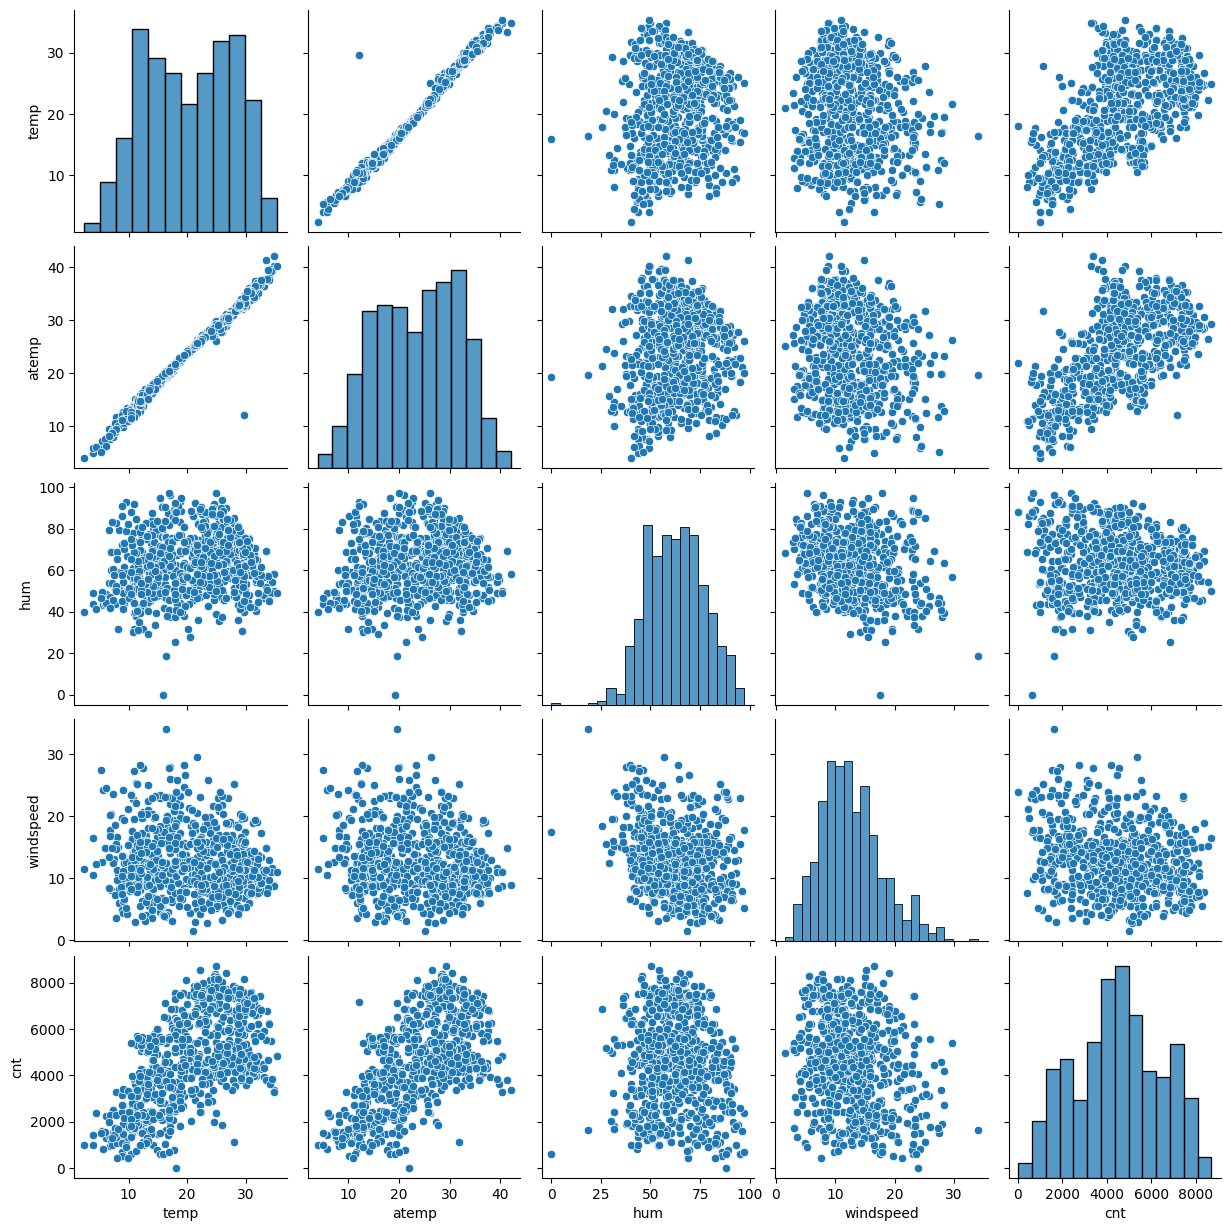

In [978]:
### Lets Plot PaitPlot for numercial data temp, atemp, hum, windspeed, cnt
num_bike = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(num_bike)
plt.show()

##### Interpretation of above pairplot

From the above plot below are the observation:
 * Temp and Atemp are one of the predictors which are strongly related to target varible cnt and have positive linearity.
 * Further hum and windspeed seems to have negative linearty witth respect to target variable cnt but the association seems to be weak

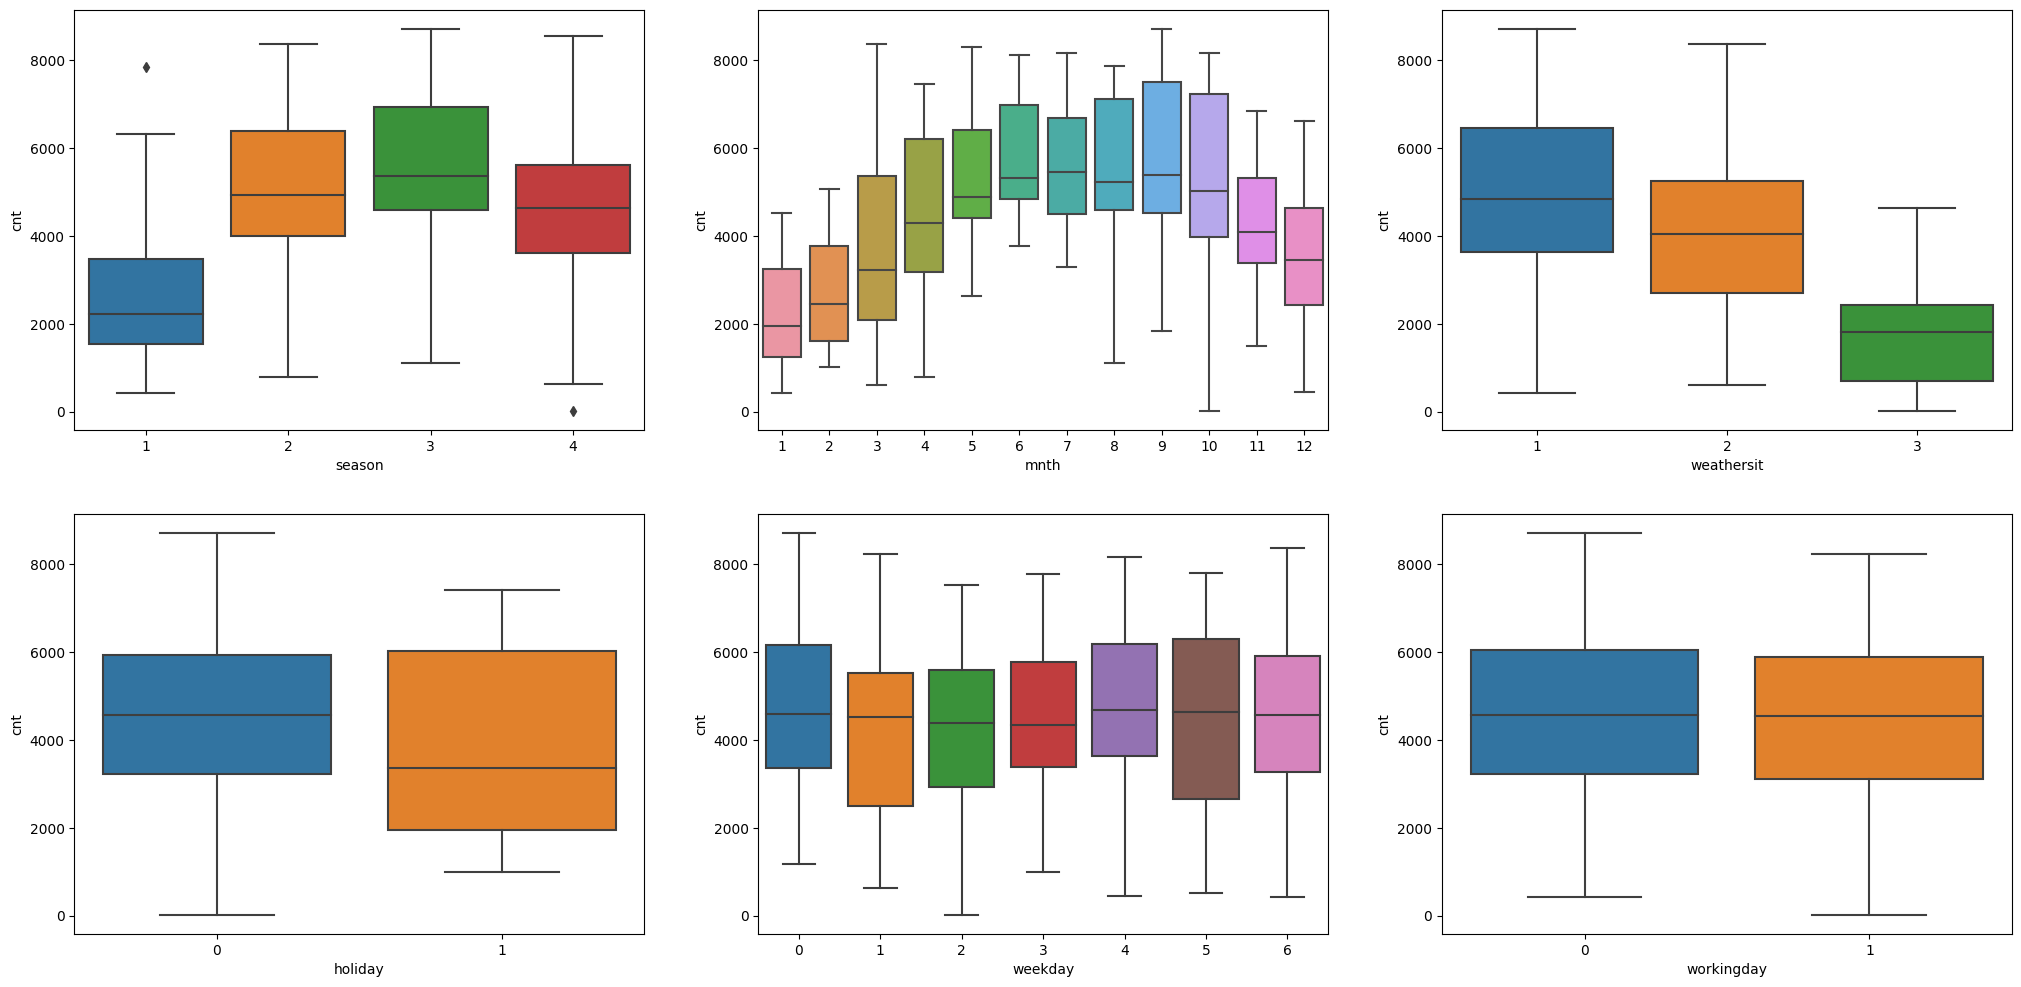

In [979]:
plt.figure(figsize=(25, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data= new_bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data= new_bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data= new_bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data= new_bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data= new_bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data= new_bike)
plt.show()

From the above box plots for 6 categorical data below are the inferences:
* From the season's plot we can see that most of the bookings were done in fall(season 3) followed by summer(season2)  and winter(season4) and season can be a good predictor

* Also we can see that most bookings happened during month 5, 6, 7, 8, 9, 10 and it seems there is a good trend here so month can also be a good predictor.

* Weatherit 1 saw the most number of bookings followed by weathersit 2. This variable also seems to follow a good trend thus this can be a good predictor as well.

* Most of the booking was done during non-holiday and this seems to be a bad predictor for out model as the variable holiday seems to be biased.

* Weekday variables seem to have no clear trend and all the medians are more less same, so we can't evidently say if this can be a good predictor for the model or not.

* Most of the booking has happened in the working day with median at around 5000. Seems like working day can be a good predictor for the model


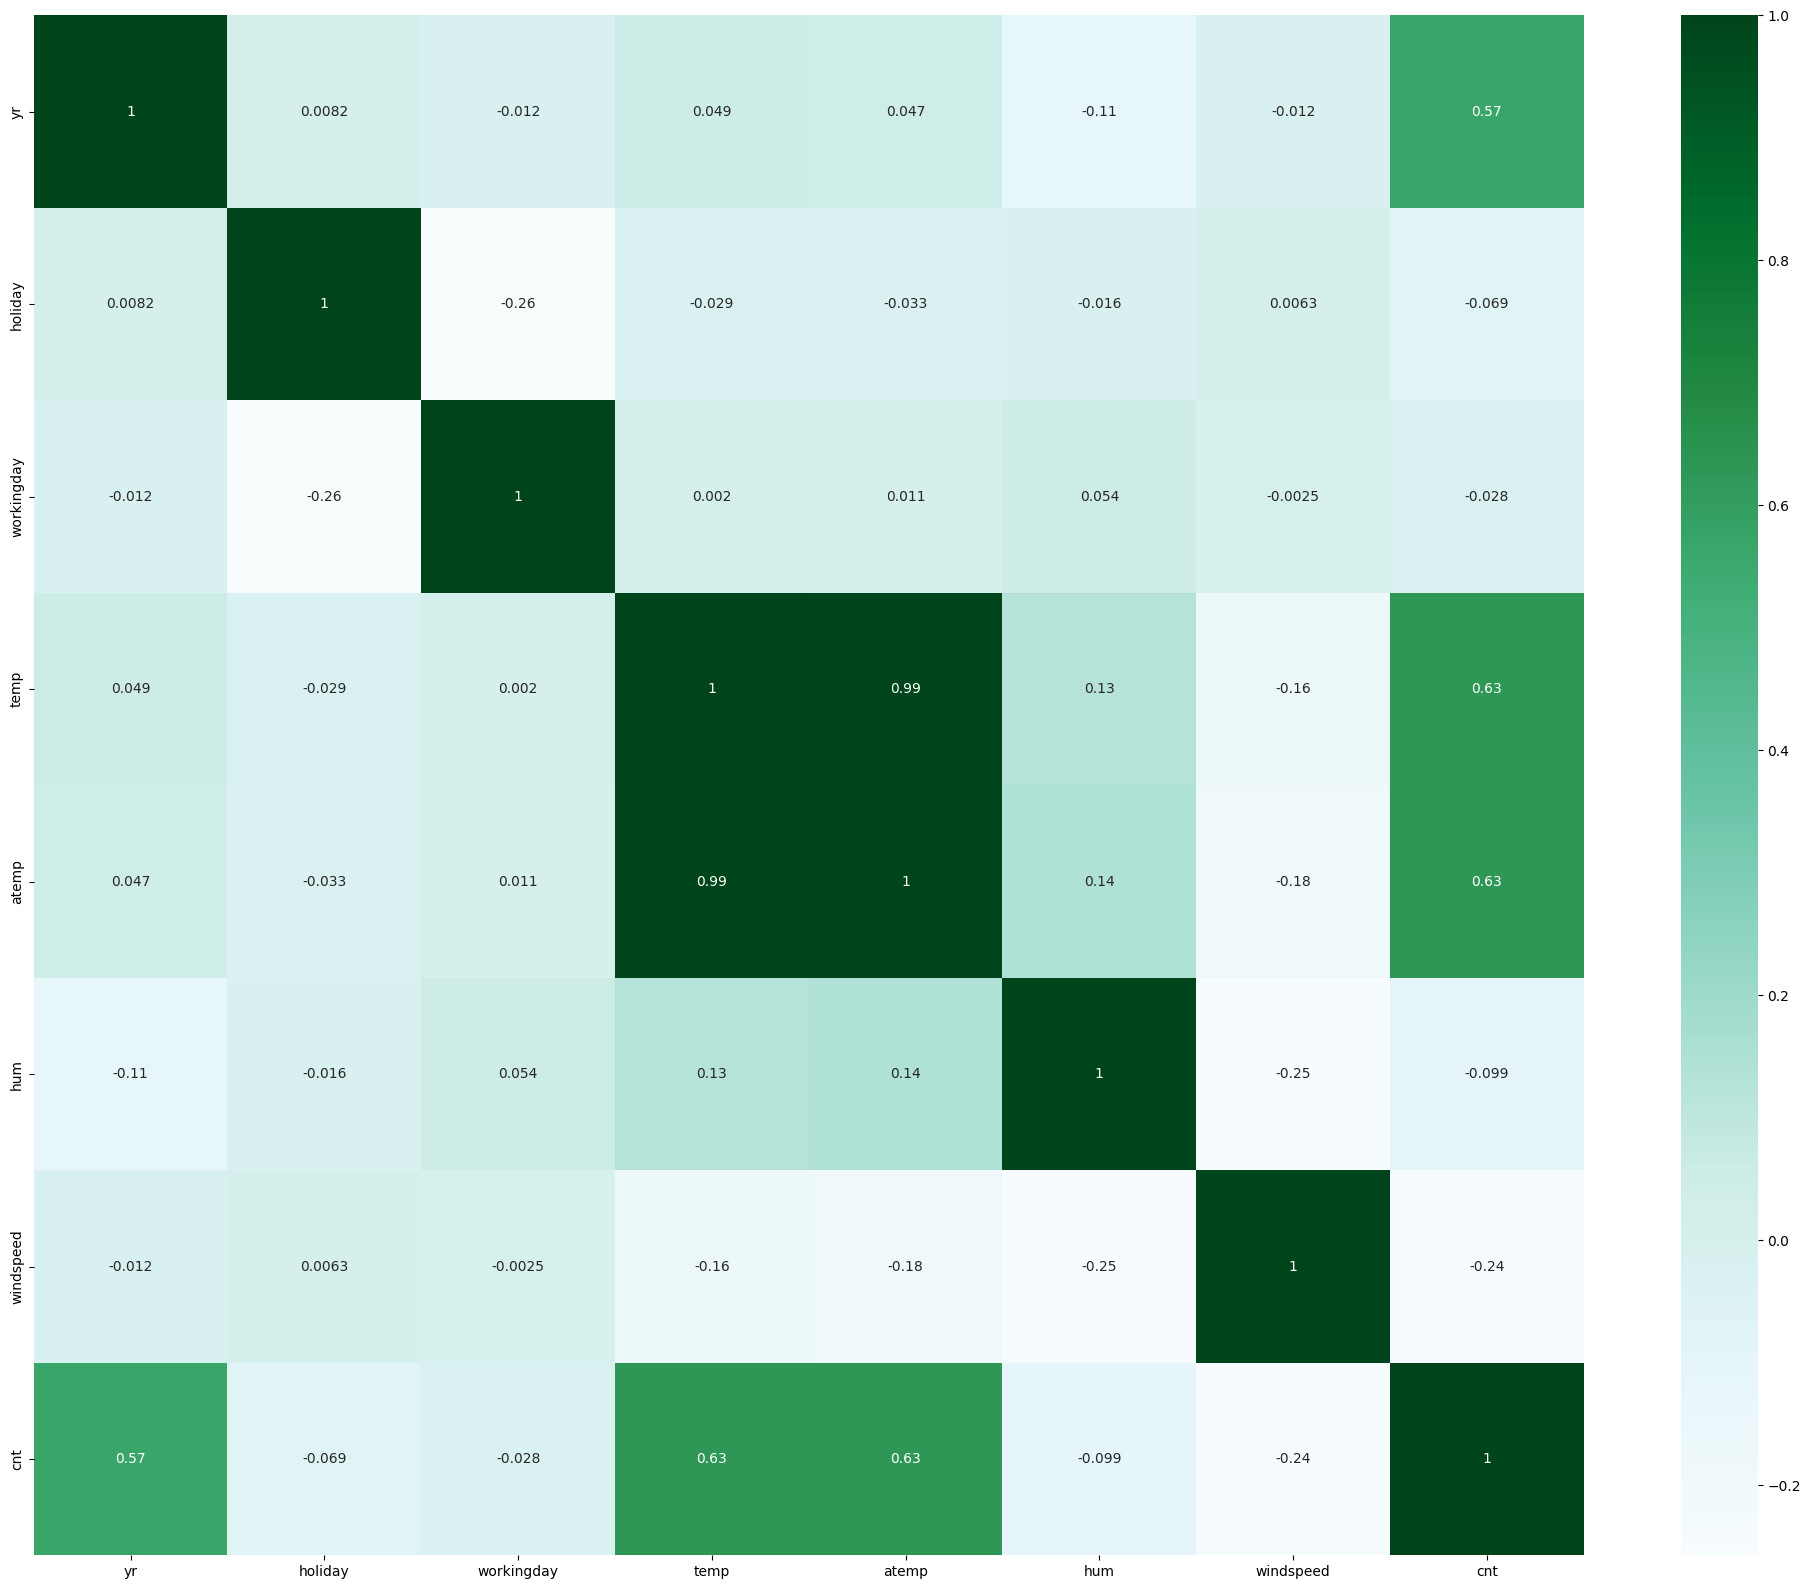

In [980]:
plt.figure(figsize = (25,20))
sns.heatmap(new_bike.corr(), annot = True, cmap="BuGn")
plt.show()

The heatmap shows us the multicollinearity between the variables and also the collinearity between target and other variable.

### Dummy variables

Let us create dummy variable for the catagorical Data season, mnth, weekday and weathersit.

In [981]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [982]:
### Creating Dummy variables 
### Drop original Columns from the dummy was created
### Drop the first dummy variable from each dummy set.

new_bike = pd.get_dummies(new_bike, drop_first = True)

In [983]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    


#### Splitting Data into Train and Test data

In [984]:
### Lets split the data into test and train

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_bike, train_size = 0.70, test_size = 0.30, random_state = 333)

In [985]:
df_train.shape

(510, 30)

In [986]:
df_test.shape

(219, 30)

#### Rescaling the numerical variables

In [987]:
from sklearn.preprocessing import MinMaxScaler

In [988]:
scaler = MinMaxScaler()

In [989]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,1,0,0,0,0,0,0


In [990]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [991]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,1,0,0,0,0,0,0


In [992]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building Linear Model

In [993]:
y_train = df_train.pop('cnt')
X_train = df_train

In [994]:
# Lets first use Automatic Feature selection to eliminate 15 features. 
# Then we will have manual fine tuning on the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [995]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [996]:
# Let us get the columns filtered by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [997]:
X_train_rfe = X_train[rfe_col]

#### Building Linear Model Using "Stats Model"

In [998]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [999]:
lr1.params


const           0.238008
yr              0.228826
temp            0.394274
atemp           0.088717
hum            -0.170955
windspeed      -0.179931
season_2        0.132386
season_3        0.085290
season_4        0.152474
mnth_3          0.047074
mnth_9          0.100467
mnth_10         0.055654
weekday_1      -0.024262
weekday_2      -0.036756
weathersit_2   -0.047653
weathersit_3   -0.272332
dtype: float64

In [1000]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.36e-185
Time:                        23:43:04   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2380      0.028      8.437      0.000       0.183       0.293
yr               0.2288      0.008     27.884      0.000       0.213       0.245
temp             0.3943      0.135      2.921      0.004       0.129       0.659
atemp            0.0887      0.138      0.642      0.521      -0.183       0.360
hum             -0.1710      0.038     -4.541      0.000      -0.245      -0.097
windspeed       -0.1799      0.028     -6.400      0.000      -0.235      -0.125
season_2         0.1324      0.015      8.669      0.000       0.102       0.162
season_3         0.0853      0.021      4.063      0.000       0.044       0.127
season_4         0.1525      0.014     10.648      0.000       0.124       0.181
mnth_3           0.0471      0.016      2.940      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.302      0.000       0.069       0.132
mnth_10          0.0557      0.018      3.101      0.002       0.020       0.091
weekday_1       -0.0243      0.012     -2.055      0.040      -0.047      -0.001
weekday_2       -0.0368      0.011     -3.218      0.001      -0.059      -0.014
weathersit_2    -0.0477      0.011     -4.450      0.000      -0.069      -0.027
weathersit_3    -0.2723      0.029     -9.533      0.000      -0.328      -0.216
==============================================================================
Omnibus:                       93.066   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.298
Skew:                          -0.933   Prob(JB):                     1.19e-49
Kurtosis:                       5.668   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1001]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,386.08
2,atemp,364.04
3,hum,16.13
6,season_3,7.11
4,windspeed,4.51
5,season_2,3.54
7,season_4,3.02
13,weathersit_2,2.15
0,yr,2.02
10,mnth_10,1.66


From the P value and the VIF we can see that temp and hum are have high VIF but they can be important as per buisness needs

### Model 2 

##### atemp has high VIF and also has high P value so this can be dropped from the model.

In [1002]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)


In [1003]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [1004]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.20e-186
Time:                        23:43:05   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2393      0.028      8.509      0.000       0.184       0.295
yr               0.2288      0.008     27.898      0.000       0.213       0.245
temp             0.4782      0.034     14.154      0.000       0.412       0.545
hum             -0.1702      0.038     -4.525      0.000      -0.244      -0.096
windspeed       -0.1834      0.028     -6.652      0.000      -0.238      -0.129
season_2         0.1326      0.015      8.686      0.000       0.103       0.163
season_3         0.0838      0.021      4.019      0.000       0.043       0.125
season_4         0.1528      0.014     10.689      0.000       0.125       0.181
mnth_3           0.0473      0.016      2.956      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.308      0.000       0.069       0.132
mnth_10          0.0558      0.018      3.109      0.002       0.021       0.091
weekday_1       -0.0239      0.012     -2.028      0.043      -0.047      -0.001
weekday_2       -0.0365      0.011     -3.196      0.001      -0.059      -0.014
weathersit_2    -0.0479      0.011     -4.474      0.000      -0.069      -0.027
weathersit_3    -0.2728      0.029     -9.559      0.000      -0.329      -0.217
==============================================================================
Omnibus:                       92.167   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.631
Skew:                          -0.925   Prob(JB):                     4.53e-49
Kurtosis:                       5.655   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1005]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.19
2,hum,15.85
5,season_3,7.03
3,windspeed,4.35
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


### Model 3

##### Lets remove season_3, as it has high VIF value(7.03) and temp and for now seems to be important from buisness percepective.

In [1006]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [1007]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)


lr3 = sm.OLS(y_train, X_train_lm3).fit()


In [1008]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          2.32e-184
Time:                        23:43:05   Log-Likelihood:                 498.40
No. Observations:                 510   AIC:                            -968.8
Df Residuals:                     496   BIC:                            -909.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2332      0.029      8.180      0.000       0.177       0.289
yr               0.2268      0.008     27.290      0.000       0.210       0.243
temp             0.5865      0.021     28.342      0.000       0.546       0.627
hum             -0.1851      0.038     -4.872      0.000      -0.260      -0.110
windspeed       -0.1908      0.028     -6.832      0.000      -0.246      -0.136
season_2         0.0869      0.010      8.403      0.000       0.067       0.107
season_4         0.1243      0.013      9.867      0.000       0.100       0.149
mnth_3           0.0362      0.016      2.261      0.024       0.005       0.068
mnth_9           0.1121      0.016      7.048      0.000       0.081       0.143
mnth_10          0.0452      0.018      2.512      0.012       0.010       0.081
weekday_1       -0.0209      0.012     -1.752      0.080      -0.044       0.003
weekday_2       -0.0347      0.012     -3.001      0.003      -0.057      -0.012
weathersit_2    -0.0455      0.011     -4.200      0.000      -0.067      -0.024
weathersit_3    -0.2612      0.029     -9.061      0.000      -0.318      -0.205
==============================================================================
Omnibus:                       75.283   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.924
Skew:                          -0.828   Prob(JB):                     1.02e-33
Kurtosis:                       5.099   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1009]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,15.09
1,temp,8.17
3,windspeed,4.29
5,season_4,2.24
11,weathersit_2,2.13
0,yr,2.01
8,mnth_10,1.63
4,season_2,1.58
7,mnth_9,1.24
9,weekday_1,1.22


### Model 4

##### Lets remove hum, as it has has VIF (15.09)

In [1010]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [1011]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)


lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [1012]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.66e-180
Time:                        23:43:05   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1252      0.018      6.828      0.000       0.089       0.161
yr               0.2311      0.008     27.354      0.000       0.215       0.248
temp             0.5645      0.021     27.333      0.000       0.524       0.605
windspeed       -0.1513      0.027     -5.535      0.000      -0.205      -0.098
season_2         0.0832      0.011      7.891      0.000       0.062       0.104
season_4         0.1172      0.013      9.163      0.000       0.092       0.142
mnth_3           0.0431      0.016      2.646      0.008       0.011       0.075
mnth_9           0.1044      0.016      6.449      0.000       0.073       0.136
mnth_10          0.0427      0.018      2.320      0.021       0.007       0.079
weekday_1       -0.0250      0.012     -2.049      0.041      -0.049      -0.001
weekday_2       -0.0381      0.012     -3.224      0.001      -0.061      -0.015
weathersit_2    -0.0763      0.009     -8.462      0.000      -0.094      -0.059
weathersit_3    -0.3153      0.027    -11.589      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       67.388   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.494
Skew:                          -0.768   Prob(JB):                     7.60e-29
Kurtosis:                       4.933   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1013]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.72
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


### Model 5

##### Now lets remove weekday_1 as it has High P value.

In [1014]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

In [1015]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)


lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [1016]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.1
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          8.89e-181
Time:                        23:43:05   Log-Likelihood:                 484.34
No. Observations:                 510   AIC:                            -944.7
Df Residuals:                     498   BIC:                            -893.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1189      0.018      6.556      0.000       0.083       0.155
yr               0.2316      0.008     27.328      0.000       0.215       0.248
temp             0.5673      0.021     27.443      0.000       0.527       0.608
windspeed       -0.1515      0.027     -5.527      0.000      -0.205      -0.098
season_2         0.0834      0.011      7.880      0.000       0.063       0.104
season_4         0.1174      0.013      9.149      0.000       0.092       0.143
mnth_3           0.0449      0.016      2.748      0.006       0.013       0.077
mnth_9           0.1042      0.016      6.418      0.000       0.072       0.136
mnth_10          0.0440      0.018      2.382      0.018       0.008       0.080
weekday_2       -0.0339      0.012     -2.906      0.004      -0.057      -0.011
weathersit_2    -0.0759      0.009     -8.391      0.000      -0.094      -0.058
weathersit_3    -0.3152      0.027    -11.548      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       68.096   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.281
Skew:                          -0.785   Prob(JB):                     2.30e-28
Kurtosis:                       4.877   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1017]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.03
2,windspeed,3.64
0,yr,2.00
4,season_4,1.93
7,mnth_10,1.63
3,season_2,1.56
9,weathersit_2,1.50
6,mnth_9,1.23
8,weekday_2,1.18
5,mnth_3,1.14


### Model 6

##### Now lets remove mnth 10 as it has high P value.

In [1018]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [1019]:
X_train_lm6 = sm.add_constant(X_train_new)


lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [1020]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          9.43e-181
Time:                        23:43:05   Log-Likelihood:                 481.45
No. Observations:                 510   AIC:                            -940.9
Df Residuals:                     499   BIC:                            -894.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1163      0.018      6.395      0.000       0.081       0.152
yr               0.2304      0.008     27.108      0.000       0.214       0.247
temp             0.5749      0.021     28.011      0.000       0.535       0.615
windspeed       -0.1545      0.028     -5.616      0.000      -0.209      -0.100
season_2         0.0821      0.011      7.738      0.000       0.061       0.103
season_4         0.1332      0.011     12.063      0.000       0.112       0.155
mnth_3           0.0456      0.016      2.779      0.006       0.013       0.078
mnth_9           0.0975      0.016      6.070      0.000       0.066       0.129
weekday_2       -0.0333      0.012     -2.836      0.005      -0.056      -0.010
weathersit_2    -0.0742      0.009     -8.190      0.000      -0.092      -0.056
weathersit_3    -0.3094      0.027    -11.330      0.000      -0.363      -0.256
==============================================================================
Omnibus:                       60.323   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.904
Skew:                          -0.726   Prob(JB):                     6.11e-24
Kurtosis:                       4.709   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1021]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.92
2,windspeed,3.60
0,yr,1.99
3,season_2,1.56
8,weathersit_2,1.49
4,season_4,1.38
6,mnth_9,1.20
7,weekday_2,1.18
5,mnth_3,1.14
9,weathersit_3,1.07


###### We can stop here and keep these features in our model. Although temp has slightly high VIF(5.01) but we can have it, as it seems to be important feature with respect to buisness requirement.

### Plotting Histogram for Errors

In [1022]:
y_train_pred = lr6.predict(X_train_lm6)


Text(0.5, 0, 'Errors')

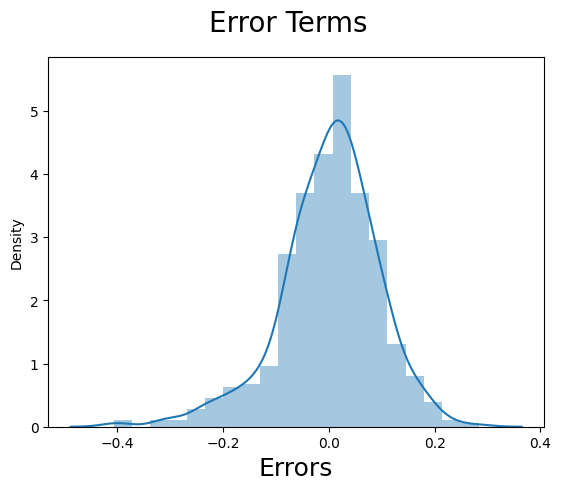

In [1023]:
res = y_train-y_train_pred

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         


###### As we can see from the above histogram the errors are normally distributed. Hence our assumption for linear regression is correct.

## Testing Final Model

In [1024]:
### Firstly lets scale all the numerical valriable based on training data.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

### As we can't do fitting on testing data we will transform based on training data.
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1025]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [1026]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.146119,0.123288,0.168950,0.150685,0.132420,0.141553,0.324201,0.036530
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.354034,0.329520,0.375566,0.358561,0.339723,0.349389,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1027]:
### Dividing test data into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [1028]:
test_col=X_train_new.columns
X_test=X_test[test_col]
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_3        219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_2     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [1029]:
y_pred = lr6.predict(X_test_lm)

### Model Evaluation

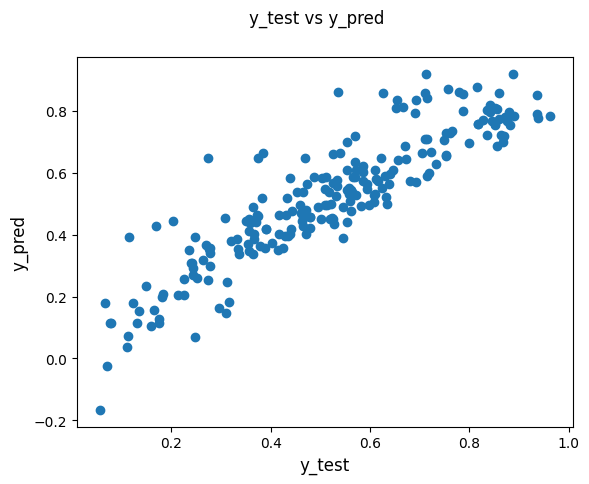

In [1030]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 12)              # Plot heading 
plt.xlabel('y_test', fontsize = 12)                          # X-label
plt.ylabel('y_pred', fontsize = 12) 
plt.show()

In [1031]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8021403119729936

In [1032]:
r2 = r2_score(y_test, y_pred)

In [1033]:

n = X_test.shape[0]

p = X_test.shape[1]


adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7926278269716952

### Final Model Results
* Train R2 = 0.823
* Train adjusted R2 = 0.820
* Test R2 = 0.8021403119729936
* Test adjusted R2 = 0.7926278269716952

##### This seems to be good result and thus can be generalized.